In [10]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
la = pd.read_csv("la_2019.csv", parse_dates=["start_time","end_time"])
la.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,Walk-up,Main & 1st,Broadway & 9th
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,Walk-up,Main & 1st,Broadway & 9th


In [7]:
def get_weekday (ts):
    return ts.weekday()
la["Weekday"]=la["start_time"].apply(lambda x: get_weekday (x))
la.head()

,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,Weekday
0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,1
1,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,1
2,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,1
3,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,3075,05860,Walk-up,Main & 1st,Broadway & 9th,1
4,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,3075,06006,Walk-up,Main & 1st,Broadway & 9th,1


In [19]:
walk_up = la[la["user_type"]=="Walk-up"]
monthly = la[la["user_type"]=="Monthly Pass"]
annual = la[la["user_type"]=="Annual Pass"]
oneday = la[la["user_type"]=="One Day Pass"]
flex = la[la["user_type"]=="Flex Pass"]

In [33]:
walk_mon = walk_up[walk_up["Weekday"]==0]
walk_tue = walk_up[walk_up["Weekday"]==1]
walk_wed = walk_up[walk_up["Weekday"]==2]
walk_thu = walk_up[walk_up["Weekday"]==3]
walk_fri = walk_up[walk_up["Weekday"]==4]
walk_sat = walk_up[walk_up["Weekday"]==5]
walk_sun = walk_up[walk_up["Weekday"]==6]
walk_rides = np.array([walk_mon["start_time"].size, walk_tue["start_time"].size, walk_wed["start_time"].size, walk_thu["start_time"].size, walk_fri["start_time"].size, walk_sat["start_time"].size, walk_sun["start_time"].size])
walk_rides

array([ 9917, 10123,  9068, 10205, 12212, 14580, 14749])

In [32]:
monthly_mon = monthly[monthly["Weekday"]==0]
monthly_tue = monthly[monthly["Weekday"]==1]
monthly_wed = monthly[monthly["Weekday"]==2]
monthly_thu = monthly[monthly["Weekday"]==3]
monthly_fri = monthly[monthly["Weekday"]==4]
monthly_sat = monthly[monthly["Weekday"]==5]
monthly_sun = monthly[monthly["Weekday"]==6]
monthly_rides = np.array([monthly_mon["start_time"].size, monthly_tue["start_time"].size, monthly_wed["start_time"].size, monthly_thu["start_time"].size, monthly_fri["start_time"].size, monthly_sat["start_time"].size, monthly_sun["start_time"].size])
monthly_rides

array([26764, 29516, 27561, 28432, 27471, 16561, 16360])

In [31]:
annual_mon = annual[annual["Weekday"]==0]
annual_tue = annual[annual["Weekday"]==1]
annual_wed = annual[annual["Weekday"]==2]
annual_thu = annual[annual["Weekday"]==3]
annual_fri = annual[annual["Weekday"]==4]
annual_sat = annual[annual["Weekday"]==5]
annual_sun = annual[annual["Weekday"]==6]
annual_rides = np.array([annual_mon["start_time"].size, annual_tue["start_time"].size, annual_wed["start_time"].size, annual_thu["start_time"].size, annual_fri["start_time"].size, annual_sat["start_time"].size, annual_sun["start_time"].size])
annual_rides

array([3469, 3886, 3565, 3465, 3565, 2015, 1694])

In [30]:
oneday_mon = oneday[oneday["Weekday"]==0]
oneday_tue = oneday[oneday["Weekday"]==1]
oneday_wed = oneday[oneday["Weekday"]==2]
oneday_thu = oneday[oneday["Weekday"]==3]
oneday_fri = oneday[oneday["Weekday"]==4]
oneday_sat = oneday[oneday["Weekday"]==5]
oneday_sun = oneday[oneday["Weekday"]==6]
oneday_rides = np.array([oneday_mon["start_time"].size, oneday_tue["start_time"].size, oneday_wed["start_time"].size, oneday_thu["start_time"].size, oneday_fri["start_time"].size, oneday_sat["start_time"].size, oneday_sun["start_time"].size])
oneday_rides

array([1629, 1655, 1602, 1657, 2166, 2521, 3501])

In [29]:
flex_mon = flex[flex["Weekday"]==0]
flex_tue = flex[flex["Weekday"]==1]
flex_wed = flex[flex["Weekday"]==2]
flex_thu = flex[flex["Weekday"]==3]
flex_fri = flex[flex["Weekday"]==4]
flex_sat = flex[flex["Weekday"]==5]
flex_sun = flex[flex["Weekday"]==6]
flex_rides = np.array([flex_mon["start_time"].size, flex_tue["start_time"].size, flex_wed["start_time"].size, flex_thu["start_time"].size, flex_fri["start_time"].size, flex_sat["start_time"].size, flex_sun["start_time"].size])
flex_rides

array([39, 52, 41, 56, 52, 49, 31])

Text(0.5, 1.0, 'Number of Rides throughout a week of different user types')

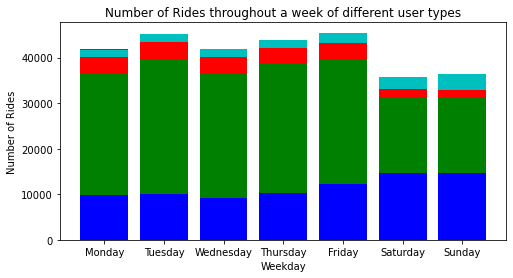

In [34]:
fig,ax = plt.subplots(figsize=(8,4))
weekdays_sub= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data = np.array([walk_rides, monthly_rides, annual_rides, oneday_rides, flex_rides])
color_list = ['b', 'g', 'r', 'c', 'm']
for i in range(data.shape[0]):
  plt.bar(weekdays_sub, data[i],
    bottom = np.sum(data[:i], axis = 0),
    color = color_list[i % len(color_list)])

ax.set_xlabel("Weekday")
ax.set_ylabel("Number of Rides")
ax.set_title("Number of Rides throughout a week of different user types")